In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [2]:
dataset = pd.read_csv('data/AirPassengers.csv')

In [3]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
dataset = pd.read_csv('data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

C:\Users\wilso\AppData\Local\Temp\ipykernel_6232\1672275989.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = pd.read_csv('data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)


In [5]:
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
time_series = dataset['#Passengers']

In [7]:
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

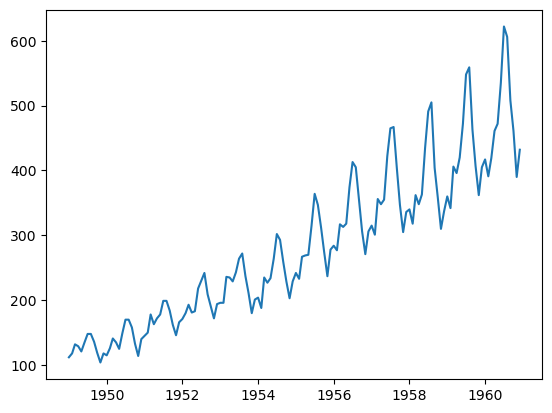

In [8]:
plt.plot(time_series)

C:\Users\wilso\AppData\Local\Temp\ipykernel_6232\2181454321.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  time_series_year = time_series.resample('Y').sum()


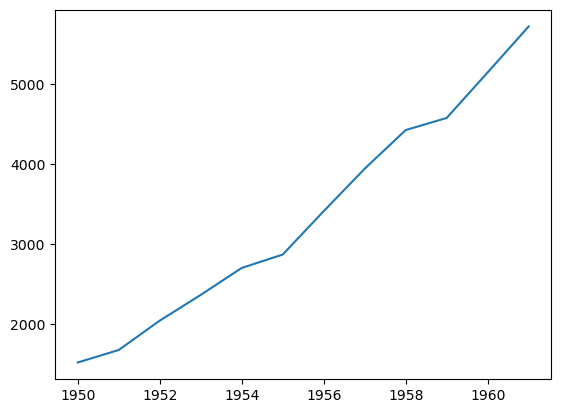

In [9]:
time_series_year = time_series.resample('Y').sum()
plt.plot(time_series_year)

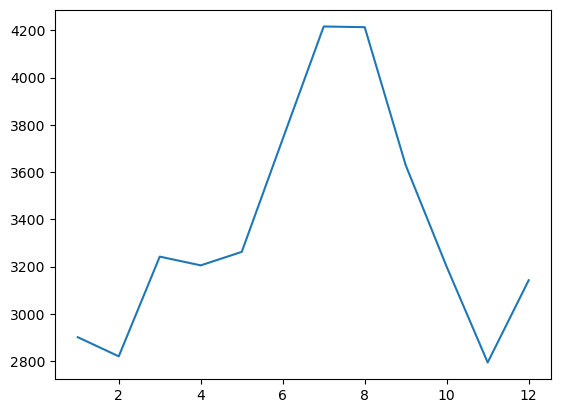

In [12]:
time_series_month = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_month)

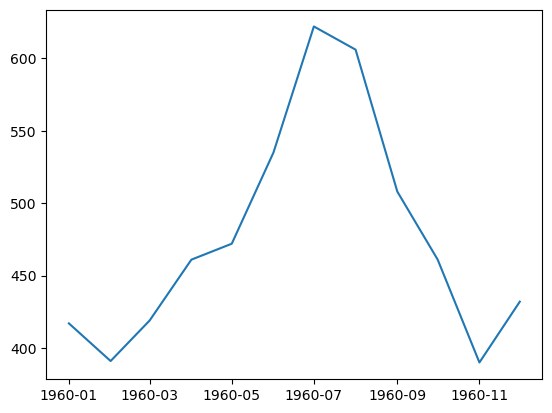

In [11]:
time_series_date = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_date)

In [13]:
decomposition = seasonal_decompose(time_series)
tendency = decomposition.trend
seasonal = decomposition.seasonal
randomic = decomposition.resid

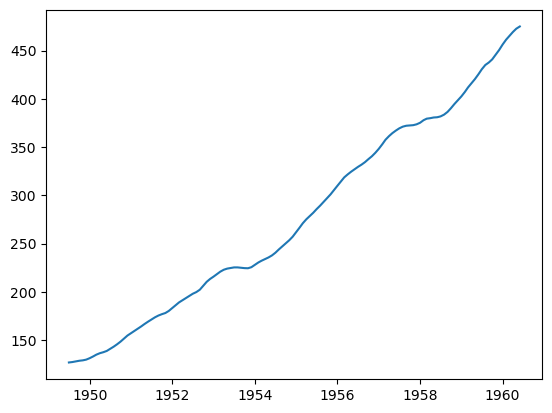

In [14]:
plt.plot(tendency)

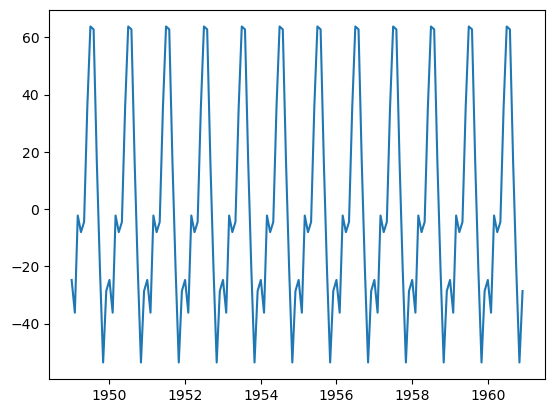

In [15]:
plt.plot(seasonal)

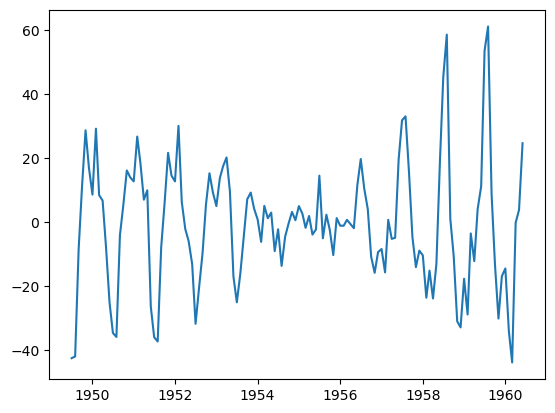

In [16]:
plt.plot(randomic)

In [17]:
# Parameters P, D, Q
model = auto_arima(time_series, order=(2, 1, 2))

c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

In [18]:
predictions = model.predict(n_periods=12)

c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [19]:
predictions

1961-01-01    467.573802
1961-02-01    490.494557
1961-03-01    509.136936
1961-04-01    492.554763
1961-05-01    495.305967
1961-06-01    475.947804
1961-07-01    476.339839
1961-08-01    475.552139
1961-09-01    472.353824
1961-10-01    483.889673
1961-11-01    475.570194
1961-12-01    485.921540
Freq: MS, dtype: float64

In [20]:
len(time_series)

144

In [21]:
train = time_series[:130]
train.shape

(130,)

In [22]:
train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [23]:
test = time_series[130:]
test.shape

(14,)

In [24]:
test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [25]:
model2 = auto_arima(train, suppress_warnings=True)

c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

In [26]:
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passengers_predicted']
prediction

c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,passengers_predicted
Month,
1959-11-01,357.690515
1959-12-01,334.857455
1960-01-01,342.488597
1960-02-01,375.944534
1960-03-01,424.126289
1960-04-01,473.151446
1960-05-01,510.388383
1960-06-01,527.724248
1960-07-01,523.268337


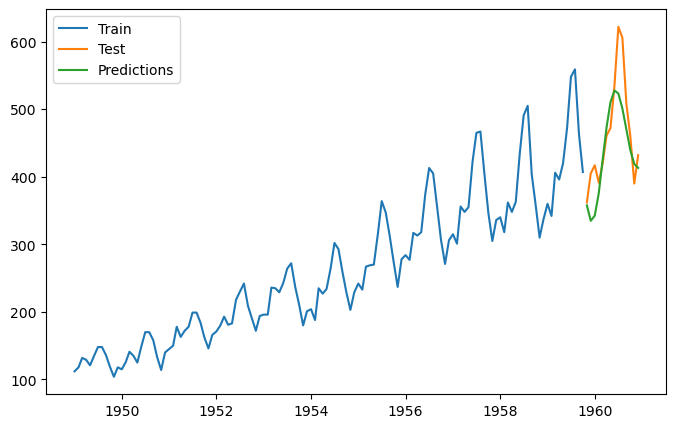

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predictions')
plt.legend();